In [26]:
"""
N.B.: Jupyter notebook compatible with RISE and pytest -nblab.
Can be executed as a regular notebook, as a presentation, a test, or converted to html slides.

These are the only things that are added to a conventional notebook:

* RISE settings are edited in notebook metadata and override system-wide settings in ~/.jupyter/nbconfig/rise.json
Refer to https://rise.readthedocs.io/en/stable/customize.html for usage and details.

Run from jupyter menu bar to obtain a live presentation, or generate html with:

     jupyter nbconvert --to slides profile_demo_rise.ipynb

* nblab uses cell directives (es. # NBVAL_IGNORE_OUTPUT) to define how to handle output changes.
Refer to https://nbval.readthedocs.io/en/latest/#Skipping-certain-output-types
for usage and details.

You may want to run this test with:

    py.test --nbval  profile_demo_rise.ipynb
    
if option `--sanitize-with nbval.cfg` is added, a file containing replacement of regular expression can be
used for a finer control of check (e.g. to ignore results that are expected to differ or exceptions that are expected
to happen).

---------------
Vincenzo Cotroneo 2021/08/14

To use as template for .ipynb demos

""";

In [27]:
# Da Profile_class_test
# NBVAL_IGNORE_OUTPUT

%reset
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [28]:
import matplotlib.pyplot as plt
import numpy as np
import os

from dataIO.span import span
from dataIO.fn_add_subfix import fn_add_subfix

from IPython.display import display
from plotting.backends import maximize

In [29]:
pwd

'c:\\Users\\kovor\\Documents\\python\\pyXTel\\source\\pyProfile\\test'

In [30]:
np

<module 'numpy' from 'c:\\Users\\kovor\\anaconda3\\lib\\site-packages\\numpy\\__init__.py'>

# Profile class

## New class implementation (2020/06/25)

Test new implementation of class from profile methods to objects, in analogy to what is done with pySurf.
Here we test and document.

In [31]:
import sys

The main class is `Profile`, representing a set of x,y data with related information and operations.

In [32]:
from pyProfile.profile_class import Profile

In [33]:
from pyProfile.profile import make_signal

Can be defined in the most trivial way from x and y: 

```python
    P = Profile(x, y, units=['mm','nm'], name='profile_1')
```

It is generally easy to write a routine to read its own format and return a Profile object.

Helper function `make_signal` (see Appendix or `make_signal?` for details) can be used to generate a (sinusoid-based) test profile. 

I can use Python introspection to get info on each function:

In [34]:
make_signal?

Signature:
make_signal(
    amp,
    x=None,
    L=None,
    N=None,
    nwaves=None,
    phase=0,
    ystartend=(0, 0),
    noise=0.0,
    minus_one=False,
)
Docstring:
Build a signal of length L and number of points N, as a sum of a cosinusoid, a line and a noise. minus_one remove last point (just a convenience e.g. for a periodic profile), note that in 
this case the returned x corresponds to values returned by
np.arange e .linspace, however it needs to be called with N+1
points, so the last one can be excluded and N points returned,
keeping intervals consistent (this might change in future versions).
Signal is generated on `x` if this is provided.
Otherwise it is generated on length `L` (can be range).
Phase adds a phase in radians (the armonic component of signal is defined as `amp*np.sin(2*np.pi*x/L*nwaves+phase)`).

VC 2020/09/11 added option for L as range and x on which to generate signal.
2020/07/17 make signal a cosine (it was a sine), because more consistent with real part 

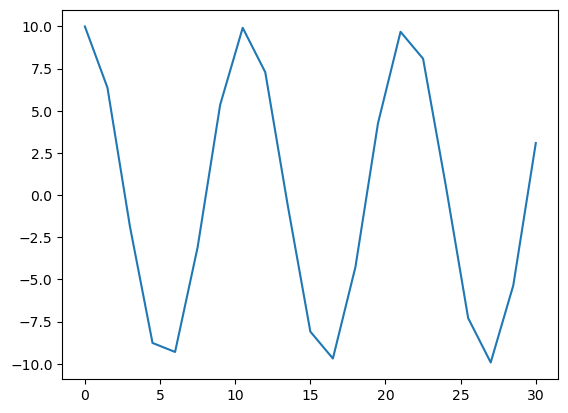

In [35]:
# use helper function to create x and y:
x,y = make_signal(amp=10.,L=30.,N=21,nwaves=2.8,ystartend=(0,0),noise=0)

# plot them with usual matplotlib commands:
plt.plot(x,y)

This is how a Profile object can be defined:

In [36]:
P = Profile(x,y,units=['mm','nm'],name='profile_1')

In [37]:
P.std()

7.044127837632114

As well, `x` and `y` can be retrieved either as `P.x` and `P.y`, or with `x,y = P()`

In [38]:
P()

(array([ 0. ,  1.5,  3. ,  4.5,  6. ,  7.5,  9. , 10.5, 12. , 13.5, 15. ,
        16.5, 18. , 19.5, 21. , 22.5, 24. , 25.5, 27. , 28.5, 30. ]),
 array([10.        ,  6.3742399 , -1.87381315, -8.7630668 , -9.29776486,
        -3.09016994,  5.35826795,  9.92114701,  7.28968627, -0.6279052 ,
        -8.09016994, -9.68583161, -4.25779292,  4.25779292,  9.68583161,
         8.09016994,  0.6279052 , -7.28968627, -9.92114701, -5.35826795,
         3.09016994]))

In [39]:
P.x

array([ 0. ,  1.5,  3. ,  4.5,  6. ,  7.5,  9. , 10.5, 12. , 13.5, 15. ,
       16.5, 18. , 19.5, 21. , 22.5, 24. , 25.5, 27. , 28.5, 30. ])

Plotting is standard python plotting (`matplotlib`), accept same arguments and manipulation. 

Text(0.5, 1.0, 'first signal test')

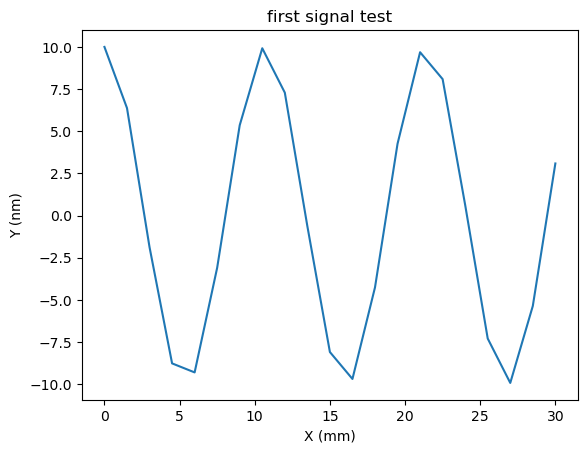

In [40]:
P.plot()
plt.title('first signal test')

In [41]:
#TODO: test remove_nan_ends.
#TODO: test register_profile.

# Profile methods and functions

## Algebraic operations

We build different test profiles.

Create two similar quadratic profiles `a` and `b` with different x values: 

BEWARE: units in algebraic operations are not verified,
usually the ones from first term are used for result,
this may change in future.

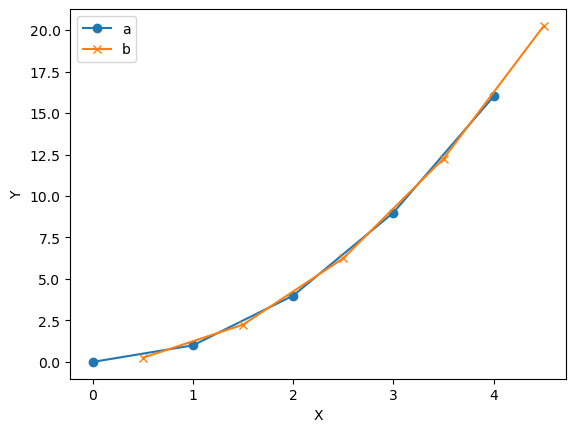

In [42]:
# Make different test profiles:

x0 = np.arange(5)

a = Profile(x0,x0**2)
a.plot(marker='o',ls='-',label = 'a')

b =  Profile(x0+0.5,(x0+0.5)**2)
b.plot(marker='x',ls='-',label = 'b')

plt.legend(loc=0)

Algebraic operations can be performed on `Profile` objects. 

Resampling can be directly accessed by `resample` method, but there is usually no need to perform, because it is automatically handled by algebraic operations (resample on first by default, ):

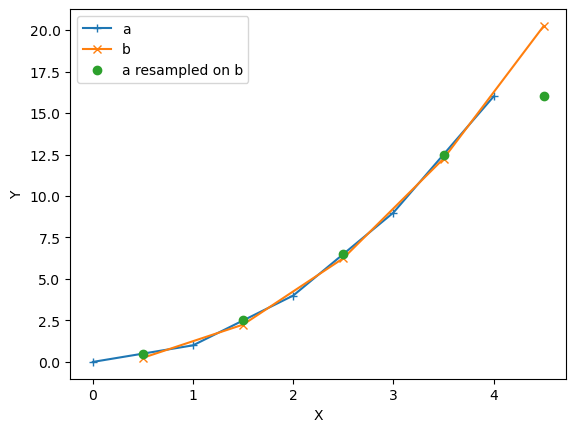

In [43]:
# plot interpolation old, note that a can be resampled (extrapolated) 
# beyond its edges, but its values are determined by `np.interpol` options which by default replicate edge value.
c = a.resample(b,trim=False)

a.plot(marker='+',ls='-',label = 'a')
b.plot(marker='x',ls='-',label = 'b')
c.plot(marker='o',ls='',label='a resampled on b')

plt.legend(loc=0)

(array([0., 1., 2., 3., 4.]), array([ 0.,  1.,  4.,  9., 16.]))
(array([0.5, 1.5, 2.5, 3.5, 4.5]), array([ 0.25,  2.25,  6.25, 12.25, 20.25]))
(array([0.5, 1.5, 2.5, 3.5]), array([ 0.5,  2.5,  6.5, 12.5]))


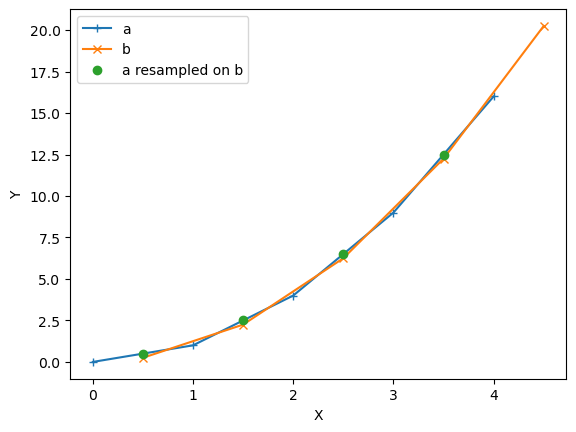

In [44]:
# plot interpolation,
# in new function, trim defaults to True, cannot sum yc + yb
c = a.resample(b)

print(a())
print(b())
print(c())

a.plot(marker='+',ls='-',label = 'a')
b.plot(marker='x',ls='-',label = 'b')
c.plot(marker='o',ls='',label='a resampled on b')

plt.legend(loc=0)

Here some examples of algebraic operations on different `x`: 

(array([0., 1., 2., 3., 4.]), array([ 0.,  1.,  4.,  9., 16.]))
(array([0.5, 1.5, 2.5, 3.5, 4.5]), array([ 0.25,  2.25,  6.25, 12.25, 20.25]))
(array([0.5, 1.5, 2.5, 3.5]), array([ 0.5,  2.5,  6.5, 12.5]))


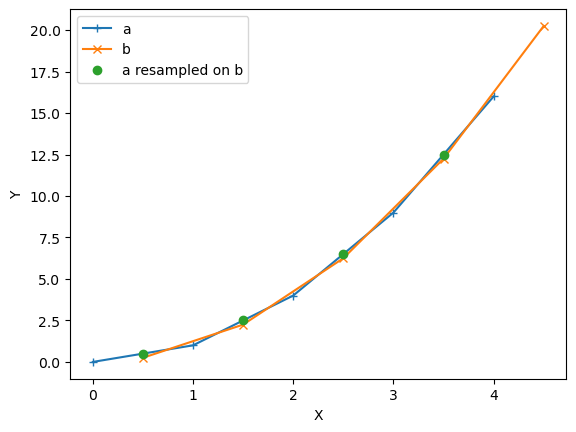

In [45]:
c = a.resample(b,trim=True)
print(a())
print(b())
print(c())
#print(a+b)
a.plot(marker='+',ls='-',label = 'a')
b.plot(marker='x',ls='-',label = 'b')
c.plot(marker='o',ls='',label='a resampled on b')
plt.legend()

In [46]:
a+b

self (id,type): 1924353895376 <class 'pyProfile.profile_class.Profile'>
other (id,type): 1924353895376 <class 'pyProfile.profile_class.Profile'>
Profile (id,type): 1924353895376 <class 'type'>
True
False


<.Profile " + " at 0x1c00e5b0e50>

self (id,type): 1924353906704 <class 'pyProfile.profile_class.Profile'>
other (id,type): 1924353906704 <class 'pyProfile.profile_class.Profile'>
Profile (id,type): 1924353906704 <class 'type'>
True
False
self (id,type): 1924353906704 <class 'pyProfile.profile_class.Profile'>
other (id,type): 1924353906704 <class 'pyProfile.profile_class.Profile'>
Profile (id,type): 1924353906704 <class 'type'>
True
False


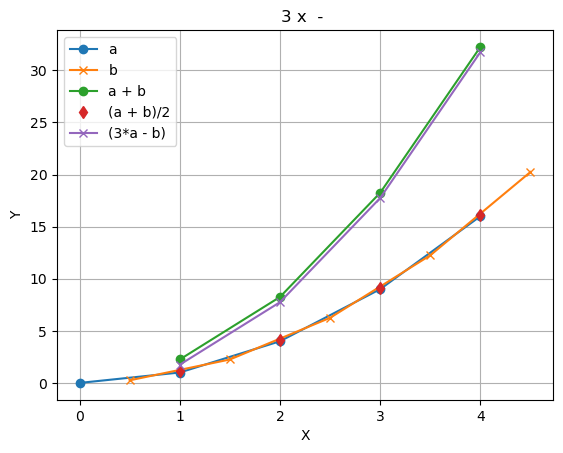

In [51]:
# test algebraic operations:
a.plot(marker='o',ls='-', label = 'a')
b.plot(marker='x',ls='-', label = 'b')
(a+b).plot(label = 'a + b',marker='o')
((a+b)/2).plot(label = '(a + b)/2',marker='d',ls='')
(3*a-b).plot(label = '(3*a - b)',marker='x',ls='-')
plt.grid()
plt.legend(loc=0)

Text(0.5, 1.0, 'ratio between interpolated and original')

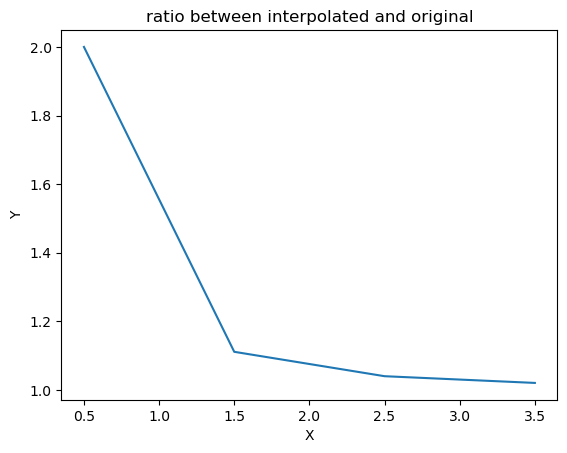

In [52]:
#(a/b).plot(label='a/b')
#(b/a).plot(label='b/a')
(c/b).plot()
plt.title('ratio between interpolated and original')

## Leveling

In [22]:
# riproduce esempio di matlab da:
# https://it.mathworks.com/help/matlab/data_analysis/detrending-data.html
#
#

fn = r'input_data\matlab-normaldata.dat'


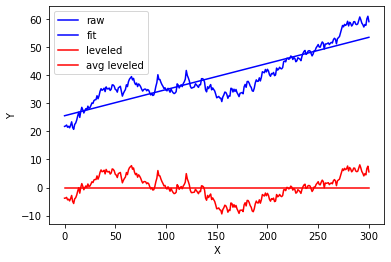

In [23]:
y = np.genfromtxt(fn)
p=Profile(np.arange(len(y)),y)
p.plot(color='b',label = 'raw')
(p-p.level()).plot(color='b',label = 'fit')
p.level().plot(color='r',label = 'leveled')
plt.plot(p.x,p.y*0+p.level().y.mean(),color='r',label = 'avg leveled')
plt.legend()

### Outliers filtering

TBD

In [24]:
a=0

In [25]:
a = 1

In [26]:
print(a)

1


## Test of `merge` and `resample` functions

#### merger for Elettra data

Prototype for a generic (n-region) reader and merger, then reimplemented in `processa_enscan.py`:

### Environment setup

In [75]:
dirresult = 'tests'
os.makedirs(dirresult, exist_ok=True)
infolder = r'input_data\Elettra_20221107'

In [117]:
from pyProfile.profile import merge_profiles, merge_profile, test_merge_profile
from pyProfile.profile import test_merge_init, test_merge_init_plot
from pyProfile.profile import resample_profile, test_resample_profile
from pyProfile.profile import test_resample_trim, test_merge_mode

from pyProfile.profile import crop_profile, sum_profiles

from dataIO.span import span


In [118]:
def mergen(files, ranges = None, binned = False):
    """Read n files representing 4 energetic regions,
    merge them according to hardcoded energies.
    The number of files is determined by the ranges passed, which are n-1.
    In this version a couple of merged files is passed, rather than a ratio,
    so they can be analysed separately, or divided outside of the function.
    (the previous version returned merged profile with ratio detector/monitor.
    The ``calib`` parameter was removed in this version, you can obtain the same
    effect dividing result[1]/result[0]*calib, where calib is a calibration Profile
    (monitor/direct beam vs energy)."""
    
    a = [read_enscan(f,) for f in files]  #each file gives a couple detector/monitor
    a = [bb/aa for aa, bb in a]   #normalize each file

    ## start looping and merging
    m = a[0]
    for aa,ss in zip(a[1:],r):
        m=m.merge(aa,ranges=ss, binned = binned)

    return m    



In [119]:

r = [[[0,170],[0,259]],    # these couples of ranges are passed to each iteration of a 
        [[0,260],[0,439]],    # two-profile merge, represent the x intevals to merge
        [[0,440],[0,1000]]]   # it must include 0 because the first profile is always the 
                            # total of previous merges.
                            
r = [[0,170],[0,259],[0,439],[0,1000]]
                            
files = [os.path.join(infolder,f) for f in 
        ['file(1)_Region 1__0164.txt',
        'file(1)_Region 2__0164.txt',
        'file(1)_Region 3__0164.txt',
        'file(1)_Region 4__0164.txt']]                            
                            
#from processa_enescan import mergen


In [120]:
# test merge_profies: manual merge

def read_enscan(file1,xcol=1):
    #fromo processa_enescan
    """return monitor and diode as Profile object."""
    with open(file1,'r',encoding='ISO-8859-1') as ff:
        f = ff.readlines()
        first = [i for i,l in enumerate(f) if  ('___________' in l) ][-1]+2
        p1m = Profile(*np.genfromtxt(file1,usecols=[xcol,5],
            delimiter='',unpack=1,skip_header=first,encoding='ISO-8859-1'),
            name='dir mon',units=['eV','']).sort()
        p1d = Profile(*np.genfromtxt(file1,usecols=[xcol,6],
            delimiter='',unpack=1,skip_header=first,encoding='ISO-8859-1'),
            name='dir dio',units=['eV','']).sort()
    
    return p1m, p1d

#load a:
a = [read_enscan(f) for f in files]  #each file gives a couple detector/monitor
a = [bb/aa for aa, bb in a]   #normalize each file

In [121]:
# set initial data for both merge_profiles and merge_profile from real data
profiles = [a[0](),a[1]()]
x1,y1 = a[0]()
x2,y2 = a[1]()

## Development of multiple merges

### This can be done with `merge_profile` (merge only two profiles)

Works well with all options.
Test of resample and sum works well here:

(array([100.000933, 119.996453, 139.993429, 159.994105, 179.995658,
       189.989255, 209.993582, 229.995753, 250.008344, 269.998138]), array([51.03133799, 30.02642307, 30.19383133, 33.52539943, 37.29480104,
       42.22760291, 47.51014816, 52.74996293, 60.51004572, 61.22432716]))


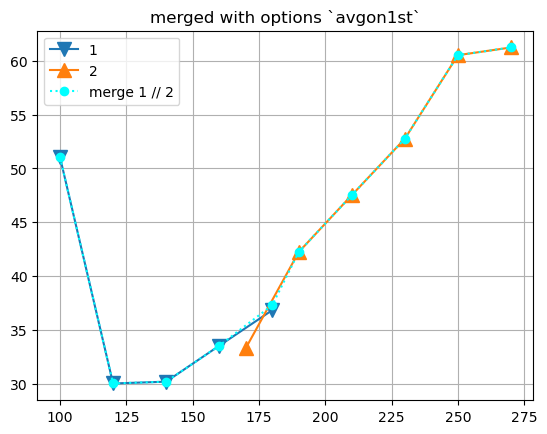

In [122]:
# This tests a single mode:

m4 = test_merge_profile(x1,y1,x2,y2,mode='avgon1st')
print(m4)

(array([100.000933, 119.996453, 139.993429, 159.994105, 179.995658,
       189.989255, 209.993582, 229.995753, 250.008344, 269.998138]), array([51.03133799, 30.02642307, 30.19383133, 33.52539943, 36.83041337,
       42.22760291, 47.51014816, 52.74996293, 60.51004572, 61.22432716]))
(array([100.000933, 119.996453, 139.993429, 159.994105, 170.005221,
       189.989255, 209.993582, 229.995753, 250.008344, 269.998138]), array([51.03133799, 30.02642307, 30.19383133, 33.52539943, 33.29218744,
       42.22760291, 47.51014816, 52.74996293, 60.51004572, 61.22432716]))
(array([100.000933, 119.996453, 139.993429, 159.994105, 179.995658,
       189.989255, 209.993582, 229.995753, 250.008344, 269.998138]), array([51.03133799, 30.02642307, 30.19383133, 33.52539943, 37.29480104,
       42.22760291, 47.51014816, 52.74996293, 60.51004572, 61.22432716]))


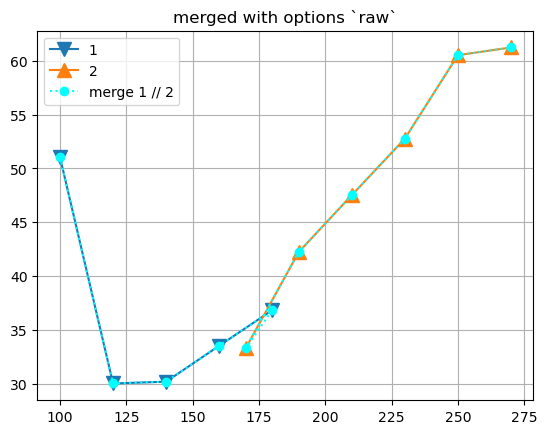

<Figure size 640x480 with 0 Axes>

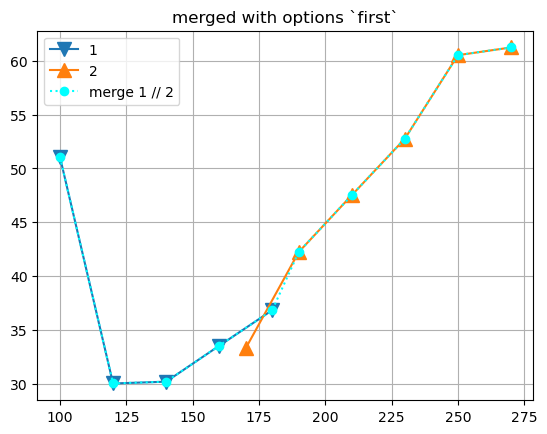

<Figure size 640x480 with 0 Axes>

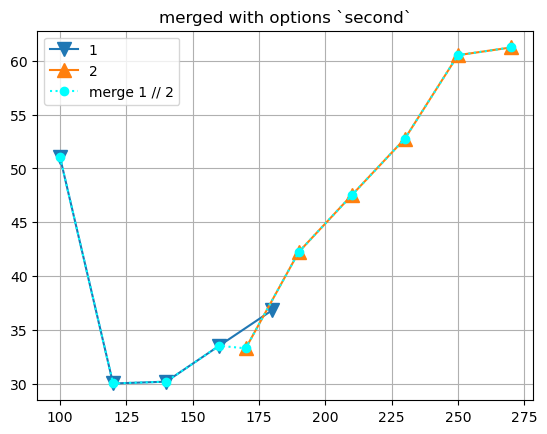

<Figure size 640x480 with 0 Axes>

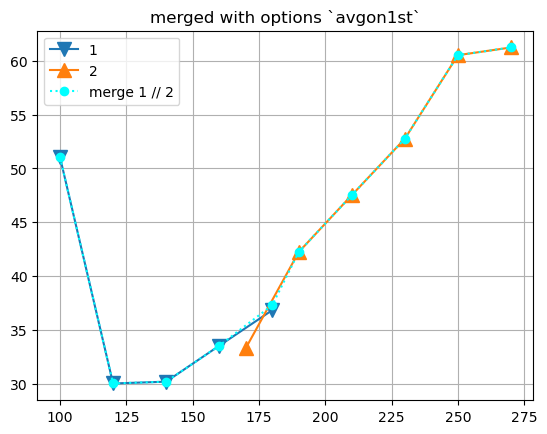

In [123]:
test_merge_mode(x1,y1,x2,y2)         

### Reimplementation of merge_profiles

#### Debug of `merge_profiles` old version

In [105]:
# This reproduces the first part of the function, used if binning is not used.
# gives xtot and ytot as lists of vectors. 
# They will be stacked before return.

ranges = None
removezero = False

if ranges is None:
    ranges = np.repeat([[None],[None]],
                        len(profiles),axis=1).T
        
xtot,ytot,bins,xvals,yvals = [] , [], [], [], []

for ran,pr in zip(ranges,profiles):
    if ran is not None:
        #print(d)
        x,y = pr
        if removezero:
            if x[0] == 0:  # this is for PSD 
                x=x[1:]
                y=y[1:]
        xx,yy = crop_profile(x,y,ran)
        #plot_psd(xx,yy,label=lab,units=['um','um','nm'])
        xtot.append(xx)
        ytot.append(yy)


In [106]:
for x,y in zip(xtot,ytot): print(len(x),len(y))

5 5
6 6


In [107]:
# now reproduce the second part, preparing and running loop 
pmin = [a.min() for a in xtot]   #xtot and ytot are now lists of profiles
igroup = np.argsort(pmin)
igroup

array([0, 1], dtype=int64)

In [108]:
print(xtot)
print(xvals)
for x,y in zip(xtot,ytot): print(len(x),len(y))

[array([100.000933, 119.996453, 139.993429, 159.994105, 179.995658]), array([170.005221, 189.989255, 209.993582, 229.995753, 250.008344,
       269.998138])]
[]
5 5
6 6


In [109]:
#print(xtot,ytot)
merge_profile(xtot[0],ytot[0],xtot[1],ytot[1])         

(array([100.000933, 119.996453, 139.993429, 159.994105, 179.995658,
        189.989255, 209.993582, 229.995753, 250.008344, 269.998138]),
 array([51.03133799, 30.02642307, 30.19383133, 33.52539943, 36.83041337,
        42.22760291, 47.51014816, 52.74996293, 60.51004572, 61.22432716]))

In [110]:
# at the end they are stacked
xtot=np.hstack(xtot)
ytot=np.hstack(ytot)
#xvals=np.hstack(xvals)
#yvals=np.hstack(yvals)
#xbins = np.hstack(bins)

## Test for profile merge and resample

## Test `resample`

In [111]:
%matplotlib inline

In [112]:
x1,y1,x2,y2 = test_merge_init()

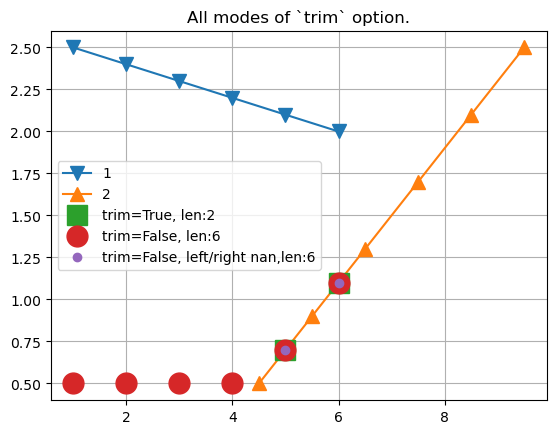

In [113]:
test_resample_trim (x1,y1,x2,y2)

#### Debug of `resample`

In [114]:
# resample x1 on x2
# works on interp and crop

yy2 = np.interp(x2,x1,y1)

print('x1',x1,y1)
print('x2',x2,y2)
print('resampled:',x2,yy2)
print(crop_profile(x2,yy2,span(x1)))

x1 [1 2 3 4 5 6] [2.5 2.4 2.3 2.2 2.1 2. ]
x2 [4.5 5.5 6.5 7.5 8.5 9.5] [0.5 0.9 1.3 1.7 2.1 2.5]
resampled: [4.5 5.5 6.5 7.5 8.5 9.5] [2.15 2.05 2.   2.   2.   2.  ]
(array([4.5, 5.5]), array([2.15, 2.05]))


### Test of `merge`

(array([1. , 2. , 3. , 4. , 5. , 6. , 6.5, 7.5, 8.5, 9.5]), array([2.5, 2.4, 2.3, 2.2, 2.1, 2. , 1.3, 1.7, 2.1, 2.5]))
(array([1. , 2. , 3. , 4. , 4.5, 5.5, 6.5, 7.5, 8.5, 9.5]), array([2.5, 2.4, 2.3, 2.2, 0.5, 0.9, 1.3, 1.7, 2.1, 2.5]))
(array([1. , 2. , 3. , 4. , 5. , 6. , 6.5, 7.5, 8.5, 9.5]), array([2.5 , 2.4 , 2.3 , 2.2 , 1.4 , 1.55, 1.3 , 1.7 , 2.1 , 2.5 ]))


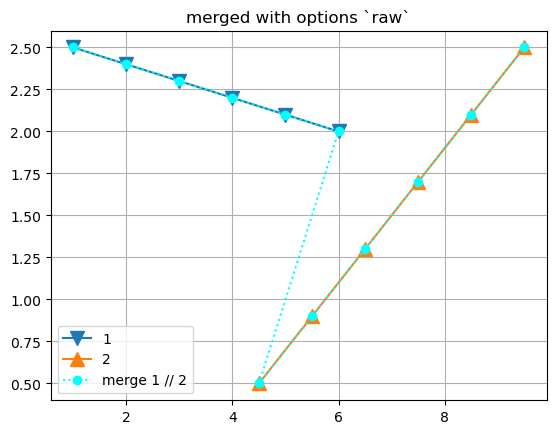

<Figure size 640x480 with 0 Axes>

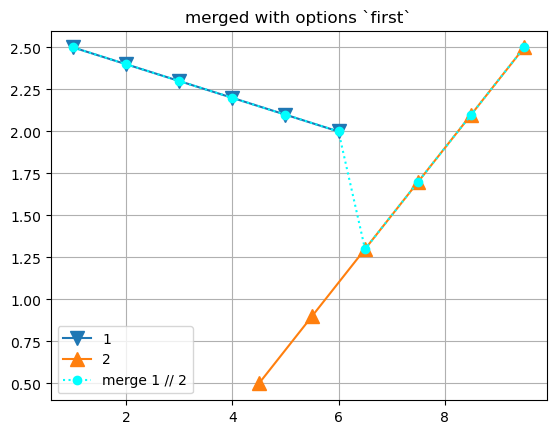

<Figure size 640x480 with 0 Axes>

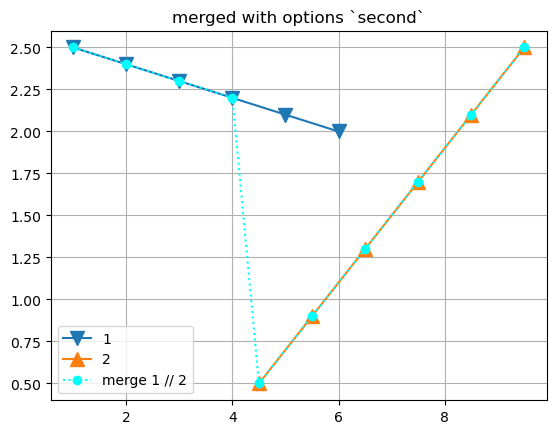

<Figure size 640x480 with 0 Axes>

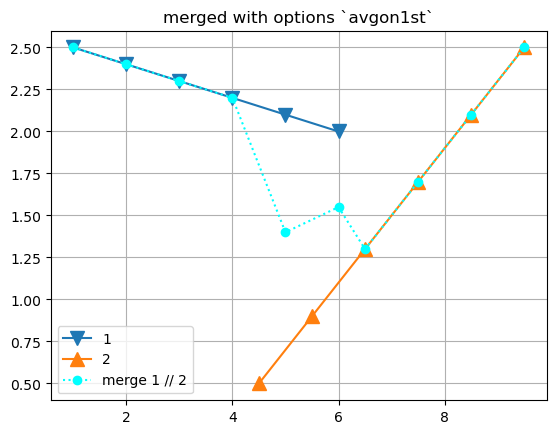

In [115]:
test_merge_mode (x1,y1,x2,y2)

#### Debug of `merge_profile`

Works well with all options.
Test of resample and sum works well here:

(array([1. , 2. , 3. , 4. , 5. , 6. , 6.5, 7.5, 8.5, 9.5]), array([2.5 , 2.4 , 2.3 , 2.2 , 1.4 , 1.55, 1.3 , 1.7 , 2.1 , 2.5 ]))


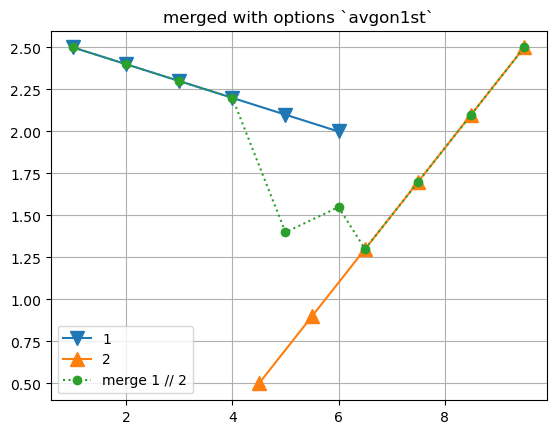

In [ ]:
# This tests a single mode:

m4 = test_merge_profile(x1,y1,x2,y2,mode='avgon1st')
print(m4)

Text(0.5, 1.0, 'merged with options `avgon1st`')

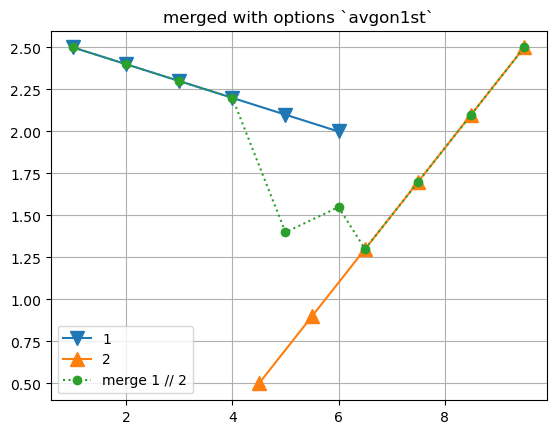

In [ ]:
# this is the internal call:

test_merge_init_plot(x1,y1,x2,y2)
m = merge_profile(x1,y1,x2,y2,mode='avgon1st')

plt.plot(*m,marker='o',ls=':',label = 'merge 1 // 2')
plt.grid()
plt.legend()
plt.title("merged with options `%s`"%mode)

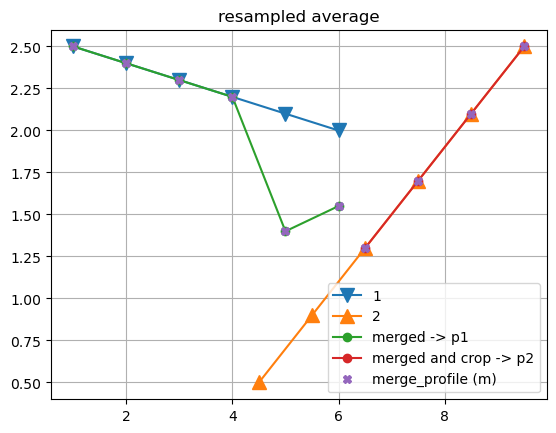

1: [1 2 3 4 5 6] [2.5 2.4 2.3 2.2 2.1 2. ]
2: [4.5 5.5 6.5 7.5 8.5 9.5] [0.5 0.9 1.3 1.7 2.1 2.5]
resampled: [6.5 7.5 8.5 9.5] [1.3 1.7 2.1 2.5]


In [ ]:
# which is internally handled as

# Internally implements a workaround that is:
xx2,yy2  = resample_profile(x2,y2,x1) # p2 resampled on p1, can have fewer points than p1
xx1,yy1 = resample_profile(x1,y1,xx2) # gives points of x1 on overlap.

test_merge_init_plot(x1,y1,x2,y2)

# in merge_profile
# beware, variable names were changed to not alter p1 and p2
xx2, yy2 = sum_profiles(x1,y1,x2, y2)
yy2 = yy2/2        
x1_,y1_ = merge_profile(x1,y1,xx2,yy2,mode = 'second') #joins x1,y1 below overlapping region with interpolated points on overlapped region
xr,yr = crop_profile(x2,y2,[max(x1_),None])  # second segment is points of x2,y2 above overlapping 

# plot
plt.plot(x1_,y1_,'o-',label='merged -> p1')     
plt.plot(xr,yr,'o-',label='merged and crop -> p2')
plt.plot(*m,'X',label='merge_profile (m)')
plt.grid()
plt.legend()
plt.title('resampled average')

plt.show() #make figure appear before print
print('1:',x1,y1)
print('2:',x2,y2)
print('resampled:',xr,yr) 

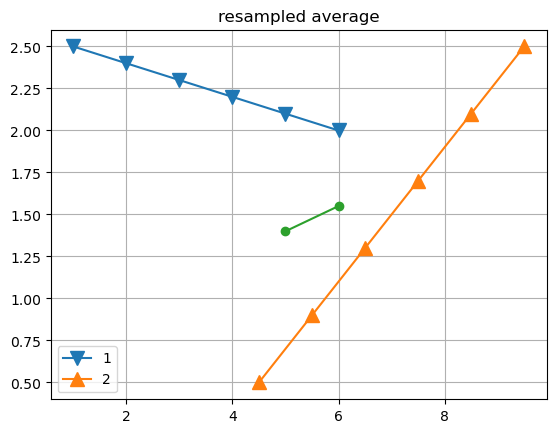

1: [1 2 3 4 5 6] [2.5 2.4 2.3 2.2 2.1 2. ]
2: [4.5 5.5 6.5 7.5 8.5 9.5] [0.5 0.9 1.3 1.7 2.1 2.5]
resampled: [5 6] [1.4  1.55]


In [ ]:
# resample and sum don't work if y1 is not also trimmed.

# This is embedded in `profile` algebraic operations, but to use them you need
#   to use e.g. `sum_profiles` instead of operating of components.
# Internally implements a workaround that is:
xx2,yy2  = resample_profile(x2,y2,x1) # p2 resampled on p1, can have fewer points than p1
xx1,yy1 = resample_profile(x1,y1,xx2) # gives points of x1 on overlap.

xr = xx1
yr = (yy1 + yy2)/2
#yy2 = (yy1 + yy2)/2     

test_merge_init_plot(x1,y1,x2,y2)
plt.plot(xr,yr,'o-')
plt.grid()
plt.legend()
plt.title('resampled average')

plt.show() #make figure appear before print
print('1:',x1,y1)
print('2:',x2,y2)
print('resampled:',xr,yr) 

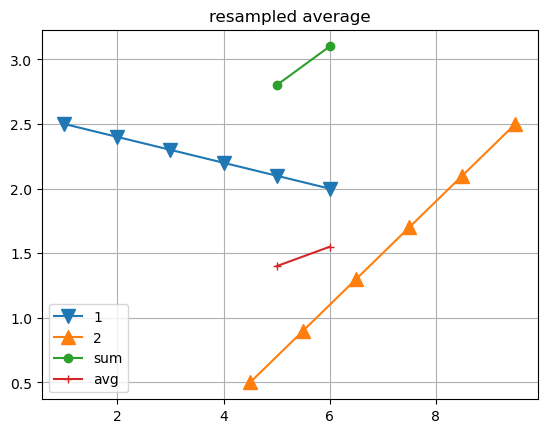

1: [1 2 3 4 5 6] [2.5 2.4 2.3 2.2 2.1 2. ]
2: [4.5 5.5 6.5 7.5 8.5 9.5] [0.5 0.9 1.3 1.7 2.1 2.5]
resampled: [5 6] [2.8 3.1]


In [ ]:
# this is how internally works in sum

xr , yr =  sum_profiles (x1,y1,x2,y2)
yr2 =yr/2

test_merge_init_plot(x1,y1,x2,y2)
plt.plot(xr,yr,'o-',label='sum')
plt.plot(xr,yr2,'+-',label='avg')
plt.grid()
plt.legend()
plt.title('resampled average')

plt.show() #make figure appear before print
print('1:',x1,y1)
print('2:',x2,y2)
print('resampled:',xr,yr) 

In [ ]:
print('1:',x1,y1)
print('2:',x2,y2)
print('resampled:',xr,yr) 

1: [1 2 3 4 5 6] [2.5 2.4 2.3 2.2 2.1 2. ]
2: [4.5 5.5 6.5 7.5 8.5 9.5] [0.5 0.9 1.3 1.7 2.1 2.5]
resampled: [5 6] [2.8 3.1]


In [ ]:
xx2,yy2 = resample_profile(x2,y2,x1,y1) #Trim True by default
xx1,yy1 = resample_profile(xx2,yy2,x1,y1)  # gives coordinates on overlap
yy2 = (yy1 + yy2)/2        

# x1,y1 = merge_profile(x1,y1,xx2,yy2,mode = 'second')
# x2,y2 = crop_profile(x2,y2,[max(x1),None])

# this is the implemented version, note the use of `open`:
x1,y1 = merge_profile(x1,y1,xx2,yy2,mode = 'second') #joins x1,y1 below overlapping region with interpolated points on overlapped region
x2,y2 = crop_profile(x2,y2,[max(x1),None], open = True)  # second segment is points of x2,y2 above overlapping 

In [ ]:
x1,y1,x2,y2 = test_merge_init() # reinitialize data for the tests above

#### Different data set and Offset

In [ ]:
from pyProfile.profile import test_resample_profile

npoints: 1
npoints: 6
npoints: 6


<Figure size 640x480 with 0 Axes>

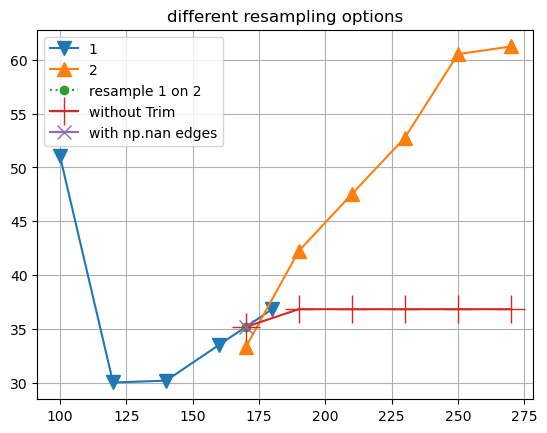

In [ ]:
# modifies x1 and x2
# repeat with merge_profiles
plt.figure()
x1,y1 = a[0]()
x2,y2 = a[1]()
mode = 'avgon1st'

m = test_resample_profile(x1,y1,x2,y2,trim=True) #default
m2 = resample_profile(x1,y1,x2,y2,trim=False)
m3 = resample_profile(x1,y1,x2,y2,trim=False,left=np.nan,right=np.nan)


plt.plot(*m2,label='without Trim',marker='+',ms=20)
plt.plot(*m3,label='with np.nan edges',marker='x',ms=10)

plt.title('different resampling options')
plt.legend()

for v in [m,m2,m3]: print('npoints:',len(v[0]))

### Development of `merge_profiles`

In [ ]:
## N.B. TBD later, this belongs to Plist

This shows how merging works without defined intervals. Overlapping is simply not handled. It is up to the user to trim the arrays beforehand to correct for overlapping. `binned` option accounts for overlapping but is not functionning at the moment: 

In [ ]:
merge_profiles([a[0](),a[1]()])

In [ ]:
# result: it is creating different length x and y 
# when binning is selected. This is because bins as array in binned_statistics
# includes both left and right extreme. Select center point of each interval.
# make option to set bin centers.

m = a[0].merge(a[1])
m2 = a[0].merge(a[1],binned=True)

P = Plist(a[:2])
P.plot()
m.plot(marker='o',ls=':')
plt.legend()
#plt.xlim([150,200])


In [ ]:
# repeat with merge_profiles

plt.plot(*a[0](),label = '1')
plt.plot(*a[1](),label = '2')
m = merge_profiles([a[0](),a[1]()])

plt.plot(*m,marker='o',ls=':',label = 'merged 1//2')
plt.legend()
#plt.xlim([150,200])
plt.title('merge a list of 2 couples x,y with profile.merge_profiles')

In [ ]:
# repeat adding binned test

plt.plot(*a[0](),label = '1',lw=5,color='yellow')
plt.plot(*a[1](),label = '2',lw=5,color='orange')
m = merge_profiles([a[0](),a[1]()])
mb = merge_profiles([a[0](),a[1]()], binned = True)

plt.plot(*m,marker='o',ls=':',color='green',label = 'merged 1//2')
plt.plot(*mb,marker='+',ms = 20,color = 'blue',ls=None,label = 'merged 1//2')
plt.legend()
#plt.xlim([150,200])
plt.title('merge a list of 2 couples x,y with profile.merge_profiles')

#### Development of binning

In [ ]:
mb = merge_profiles([a[0](),a[1]()], binned = True)
for m in mb:print (len(m))

ValueError: The smallest edge difference is numerically 0.

In [ ]:
mb

NameError: name 'mb' is not defined